<a href="https://colab.research.google.com/github/christiantommasi/MeuPortf-lioEmPythonER/blob/main/gold_apenas_didatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas necessárias apara análise dos dados

In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns

Importação do arquivo para criação do dataframe

In [2]:
df = pd.read_excel("gold.xlsx")

Visualização do data frame

In [ ]:
#São 1320 linhas por 7 colunas
df.tail()

,Date,Last,Open,High,Low,Change
1315,2025-02-10,2910.06,2892.22,2910.22,2891.19,0.61
1316,2025-02-11 00:00:00,2898.34,2907.47,2943.25,2881.75,-0.31
1317,2025-02-12 00:00:00,2903.66,2898.90,2909.16,2864.01,0.18
1318,2025-02-13 00:00:00,2929.03,2904.10,2929.74,2900.20,0.87
1319,2025-02-14 00:00:00,2883.18,2929.19,2940.23,2876.96,-1.57


Verificando o tipo de dados no data frame

In [ ]:
print(df.dtypes)

Convertendo a coluna Date para datetime

In [3]:
#Código que converte a coluna Date para date time
df['Date'] = pd.to_datetime(df['Date'])

#Código que verifica o  tipo da coluna Date novamente
print(df['Date'].dtypes)

datetime64[ns]


Verificando o tipo de dados completo do data frame

In [ ]:
print(df.dtypes)

Date      datetime64[ns]
Last             float64
Open             float64
High             float64
Low              float64
Change           float64
dtype: object


Verificando se existem valores NANs

In [ ]:
df.isna().sum()
#Não existem dados NANs

Verificação estatística dos dados

In [ ]:
df.describe()

#Relação de retornos sobre as colunas

Coluna Open em relação a mediana e a média

In [4]:
#Criando um data frame que armazena os últimos 55 valores do ouro
df_provisorio = df.tail(55)

#Visualizando as informações descritivas do df_provisorio
descricoes_estatisticas = df_provisorio.describe()

#descricoes_estatisticas

#Criando a variável que armazena o preço médio do ouro nos últimos 55 dias de pregão
preco_medio_open = df_provisorio['Open'].mean()
preco_medio_last = df_provisorio['Last'].mean()

#Criando a variável que armazena os valores do preço mínimo e máximo de Open e Last dos últimos 55 dias de pregão
preco_min_open = df_provisorio['Open'].min()
preco_max_open = df_provisorio['Open'].max()
preco_min_last = df_provisorio['Last'].min()
preco_max_last = df_provisorio['Last'].max()

#Mudança diária média e o desvio padrão da coluna Change
mudanca_media = df_provisorio['Change'].mean()
mudanca_desvio = df_provisorio['Change'].std()

#Valores extremos de mudança diária
mudanca_min = df_provisorio['Change'].min()
mudanca_max = df_provisorio['Change'].max()

#Calculando o preço médio entre Open e Last
media_open_last = (preco_medio_open + preco_medio_last) / 2

#Visualizando os resultados obtidos pelas variáveis
print(f'Esse é o preço médio da coluna Open {preco_medio_open:.2f}')
print(f'Esse é o preço médio da coluna Last {preco_medio_last:.2f}')
print(f'Esse é o preço mínimo da coluna Open {preco_min_open:.2f}')
print(f'Esse é o preço máximo da coluna Open {preco_max_open:.2f}')
print(f'Esse é o preço mínimo da coluna Last {preco_min_last:.2f}')
print(f'Esse é o preço máximo da coluna Last {preco_max_last:.2f}')
print(f'Essa é a mudança diária média da coluna Change {mudanca_media:.2f}')
print(f'Esse é o desvio padrão da coluna Change {mudanca_desvio:.2f}')
print(f'Essa é a menor variação da coluna Change {mudanca_min:.2f}')
print(f'Essa é a maior variação da coluna Change {mudanca_max:.2f}')
print(f'Esse é o preço médio entre Open e Last {media_open_last:.2f}')

Esse é o preço médio da coluna Open 2727.09
Esse é o preço médio da coluna Last 2731.46
Esse é o preço mínimo da coluna Open 2586.00
Esse é o preço máximo da coluna Open 2929.19
Esse é o preço mínimo da coluna Last 2596.00
Esse é o preço máximo da coluna Last 2929.03
Essa é a mudança diária média da coluna Change 0.18
Esse é o desvio padrão da coluna Change 0.90
Essa é a menor variação da coluna Change -1.70
Essa é a maior variação da coluna Change 2.29
Esse é o preço médio entre Open e Last 2729.27


#Analisando de forma gráfica os últimos 55 registros de pregão do ouro

Criando um gráfico da coluna Last

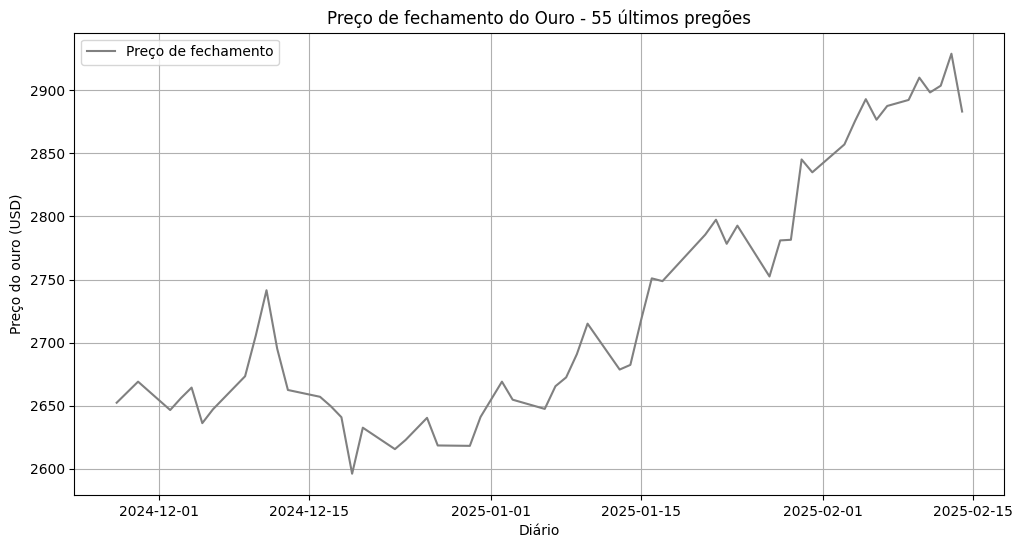

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df_provisorio['Date'], df_provisorio['Last'], label='Preço de fechamento', color='gray')
plt.xlabel('Diário')
plt.ylabel('Preço do ouro (USD)')
plt.title('Preço de fechamento do Ouro - 55 últimos pregões')
plt.legend()
plt.grid(True)
plt.show()

Criando um gráfico boxplot

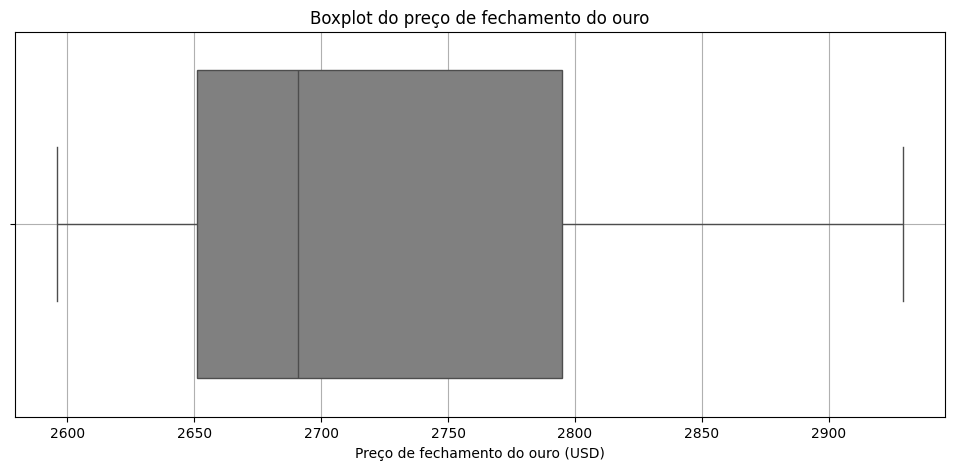

In [7]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_provisorio['Last'], color='gray')
plt.xlabel('Preço de fechamento do ouro (USD)')
plt.title('Boxplot do preço de fechamento do ouro')
plt.grid(True)
plt.show()

Baixo: Até 0,5% = Pouca variação, mercado estável.
Médio: Entre 0,5% e 1,5% = Oscilações normais para ativos consolidados.
Alto: Acima de 1,5% = Mercado volátil, grandes oscilações diárias.

#Observações vistas até o momento no gráfico

O gráfico de linha, apresenta uma forte tendência de alta desde 01/01/25, mais ou menos, onde iniciou a tendência de alta, antes disso, o gráfico estava em um movimento de lateralização.
Após o inicio da tendência de alta, o gráfico deu um boom para a alta, onde atingiu um topo na faixa dos 2920, mais ou menos, e após iniciou um reversão de tendência, não está perto de sugerir um padrão de reversão ou correção ainda de acordo com as ondas de Elliot, mas vamos acompanhando o gráfico e observando o que ele nos trás com os próximos resultados.
No boxplot foi possível observar que os preços se concentram normalmente entre 2650 e 2800, acredito que seja esse o preço ideal do ouro e o pico que foi até 2920, mais ou menos, seja um outlier, não apresentando, necessariamente, uma disparada do preço do ouro atingindo novos patamares.

#Observações sobre os estudos

Ainda estou em busca de avaliar os resultados de forma estatística e probabílistica da melhor forma que assim, possa me trazer resultados maiores e melhores, além da consistência nas aplicações no mercado Forex.
O projeto está longe de estar completo, está em suas fases iniciais e ainda nem introduzi mineração de dados e texto através de API para buscar melhores oportunidades de entrada e saída no mercado.
O ouro sempre será um ativo de segurança e proteção no mercado, é notado o boom dos preços desde o começo do ano quando trump assumiu e propos a tarifação dos países concorrentes, que dessa forma, pode gerar "guerra comercial" no mundo, trazendo tensão ao mercado e seus players.
É fundamental, que além de sentimentos de notícias do mercado, eu aplique médias, normalização, tendências e testes de hipóteses, princípios básicos da análise quantitativa.

Da primeira vez que comecei a mexer nesse sistema, eu recorri ao linkedin em busca de sugestões, mas decidi arregaçar as mangas e com pesquisas, consegui encontrar métodos que me auxiliam nessa tomada de decisão, abaixo vou listar os principais métodos que devo utilizar.

#Estatística e Probabilidade

Estatística descritiva:
1. Média e mediana para avaliar o retorno esperado.
2. Desvio padrão para avaliar o risco do ativo.
3. Assimetria (Skewness) para avaliar se os retornos estão mais inclinados para alta ou queda.
4. Curtose mede a frequência de eventos extremos (cauda gorda).

Distribuições de probabilidade:
1. Normal para avaliar aproximação de retornos financeiros
2. Log-normal para modelagem de preços de ativos.
3. Caudas pesadas (Pareto, Cauchy) para avaliar explicação de eventos extremos.
4. Distribuição de retornos para modelar a probabilidade de ganhos e perdas.

Processos estocásticos:
1. Random Walk para avaliar a hipótese de mercado eficiente.
2. Browniano Geométrico serve como base de modelo para Black-Scholes.
3. Processo de Poisson para modelar choques súbitos no mercado.
4. Teorema central do limite para justificar a aproximação normal dos retornos.

Modelos de séries temporais:
1. Médias móveis (SMA, EMA) indicadores de tendência.
2. Modelos ARIMA para predição de preços baseada em padrões passados.
3. GARCH (Generalized Autoregresive Conditional Heteroskedascity) para medir a volatibilidade futura.

Inferência estatística e teste de hipótese:
1. Teste de normalidade (Shapiro Wilk, KS-Test) para verificar se os retornos seguem uma distribuição normal.
2. Teste de independência (Dickey-Fuller, Ljung-Box) para testar se os preços seguem um caminho aleatório.
3. Correlação e regressão para medir a relação entre ativos.

Métodos de precificação e otimização:
1. Modelo Black-Scholes para precificação de opções com base na volatibilidade.
2. Teoria de Portfólio de Markowitz para maximizar o retorno ajustado ao risco usando variância e covariância.
3. Simulação de Monte Carlo para estimar distribuições de preços futuros.

Estatística Bayesiana:
1. Teorema de Bayes para atualizar probabilidades com base em novas informações, útil para prever tendências.
2. Inferência Bayesiana para modelar incertezas e melhorar previsões em mercado dinâmicos.
3. Redes Bayesianas para modelar relações probabilísticas entre variáveis financeiras.

Modelagem de dependência entre variáveis:
1. Covariância e correlação para medir a relação entre ativos (Ex: Ouro e dólar).
2. Correlação de Spearman e Kendall melhor para relações não-lineares.
3. Copulas Estatísticas para modelar dependências complexas entre variáveis financeiras.

Distribuição estatística avançada:
1. Distribuição de Pareto para modelar eventos extremos (crashes de mercado).
2. Distribuição de Lévy para explicar retornos financeiros com caudas pesadas.
3. Distribuição de Poisson para modelar frequência de eventos raros (ex: quedas bruscas).

Teoria das filas e processos de chegada:
1. Processo de Poisson não homogêneo para modelar eventos de chegadas irregulares, como ordens no mercado.
2. Cadeis de Markov para previsão de estados futuros no mercado com base no estado atual.

Estatística robusta e detecção de anomalias:
1. Média ponderada e média robusta para reduzir impacto de outliers.
2. Testes de Outliers (Z-score, IQR) para indentificar preços extremos.
3. Hodrick-Prescott Filter para separar as tendências de curto e longo prazo.

Teoria do Caos e Fractais:
1. Dimensão fractal de Hust para medir a previsibilidade de séries temporais.
2. Efeito borboleta para medir quanto pequenas variações podem causar grandes impactos.











#Alguns critérios que julgo importante para análise dos dados

Analisando a coluna Last

In [ ]:
#Distribuição das frequências dos dados contidos no df_provisorio para análise das melhores opções de investimento
distribuicao_da_frequencia_last = df_provisorio[df_provisorio['Last'] >= preco_medio_last].shape
distribuicao_da_frequencia_last
#Retornando 23 linhas

Analisando a coluna Open

In [ ]:
#Distribuição das frequências dos dados contidos no df_provisorio para análise das melhores opções de investimento
distribuicao_da_frequencia_open = df_provisorio[df_provisorio['Open'] <= preco_medio_open].shape
distribuicao_da_frequencia_open
#Retornando 33 linhas

Analisando a coluna Change

In [ ]:
#Distribuição das frequencias dos dados contidos no df_provisorio para análise da melhores opções de investimento
distribuicao_da_frequencia_change = df_provisorio[df_provisorio['Change'] >= mudanca_media].shape
distribuicao_da_frequencia_change
#Retornando 31 linhas

Criando um data frame que armazena os valores que foram analisados acima

In [ ]:
#Criando um data frame que armazena as melhores opções de investimento
df_melhores_opcoes = df_provisorio[
    (df_provisorio['Last'] >= preco_medio_last) &
    (df_provisorio['Open'] <= preco_medio_open) &
    (df_provisorio['Change'] >= mudanca_media)
]

#Fazendo a contagem dos dados para distribuição do cálculo de frequência
total_dados = df_provisorio.shape[0]

#Fazendo a contagem dos dados que atendem a cada condição
contagem_last = len(df_melhores_opcoes['Last'])
contagem_open = len(df_melhores_opcoes['Open'])
contagem_change = len(df_melhores_opcoes['Change'])

#Fazendo o cálculo das porcentagens
porcentagem_last = (contagem_last / total_dados) * 100
porcentagem_open = (contagem_open / total_dados) * 100
porcentagem_change = (contagem_change / total_dados) * 100

#Exibindo os resultados criados acima
print(f'Porcentagem de dados que atendem a condição que a coluna Last é maior que a média {porcentagem_last:.2f}')
print(f'Porcentagem de dados que atendem a condição que a coluna Open é menor que a média {porcentagem_open:.2f}')
print(f'Porcentagem de dados que atendem a condição que a coluna Change é maior que a média {porcentagem_change:.2f}')

"Percentual de dados extraídos de acordo com as condições, 3.64%"

Alguns cálculos importantes

In [ ]:
#Cálculo do coeficiente de variação
def coeficiente_variacao(df_provisorio):
  desvio_last = df_provisorio['Last'].std()
  media_last = df_provisorio['Last'].mean()
  cv_last = (desvio_last / media_last) * 100

  desvio_open = df_provisorio['Open'].std()
  media_open = df_provisorio['Open'].mean()
  cv_open = (desvio_open / media_open) * 100
  print(f'O coeficiente de variação da coluna Last é {cv_last:.2f}')
  print(f'O coeficiente de variação da coluna Open é {cv_open:.2f}')

coeficiente_variacao(df_provisorio)

"""
O coeficiente de variação da coluna Last é 3.63
O coeficiente de variação da coluna Open é 3.60
"""

def desvio_absoluto(df_provisorio):
  desvio_last = sts.stdev(df_provisorio['Last'])
  print(f'O desvio absoluto da coluna Last é {desvio_last:.2f}')
  desvio_open = sts.stdev(df_provisorio['Open'])
  print(f'O desvio absoluto da coluna Open é {desvio_open:.2f}')
  desvio_change = sts.stdev(df_provisorio['Change'])
  print(f'O desvio absoluto da coluna Change é {desvio_change:.2f}')

desvio_absoluto(df_provisorio)

"""
O desvio absoluto da coluna Last é 99.12
O desvio absoluto da coluna Open é 98.25
O desvio absoluto da coluna Change é 0.90
"""